In [91]:
import pandas as pd
import numpy.random as nr
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from datetime import datetime, date
from sklearn import preprocessing
from sklearn import linear_model
import scipy.stats as ss
import sklearn.model_selection as ms
import sklearn.metrics as sklm
%matplotlib inline

In [92]:
AW_data = pd.read_csv('AdvWorksCusts.csv')
AW_avemonth = pd.read_csv('AW_AveMonthSpend.csv')
AW_bikebuyer = pd.read_csv('AW_BikeBuyer.csv')
AW_data['AveMonthSpend'] = AW_avemonth['AveMonthSpend']
AW_data['BikeBuyer'] = AW_bikebuyer['BikeBuyer']
AW_test = pd.read_csv('AW_test.csv')
print(AW_data.head(15))

    CustomerID Title  FirstName MiddleName LastName Suffix  \
0        11000   NaN        Jon          V     Yang    NaN   
1        11001   NaN     Eugene          L    Huang    NaN   
2        11002   NaN      Ruben        NaN   Torres    NaN   
3        11003   NaN    Christy        NaN      Zhu    NaN   
4        11004   NaN  Elizabeth        NaN  Johnson    NaN   
5        11005   NaN      Julio        NaN     Ruiz    NaN   
6        11006   NaN      Janet          G  Alvarez    NaN   
7        11007   NaN      Marco        NaN    Mehta    NaN   
8        11008   NaN        Rob        NaN  Verhoff    NaN   
9        11009   NaN    Shannon          C  Carlson    NaN   
10       11010   NaN  Jacquelyn          C   Suarez    NaN   
11       11011   NaN     Curtis        NaN       Lu    NaN   
12       11012   NaN     Lauren          M   Walker    NaN   
13       11013   NaN        Ian          M  Jenkins    NaN   
14       11014   NaN     Sydney        NaN  Bennett    NaN   

       

In [93]:
print(AW_data.dtypes)
print(AW_data.shape)
print(AW_data.columns)
print(AW_data.isnull().sum())

CustomerID               int64
Title                   object
FirstName               object
MiddleName              object
LastName                object
Suffix                  object
AddressLine1            object
AddressLine2            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
AveMonthSpend            int64
BikeBuyer                int64
dtype: object
(16519, 25)
Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumb

In [94]:
print(AW_data.drop(['Title','MiddleName', 'Suffix', 'AddressLine2'], axis = 1, inplace = True))
print(AW_data.head(15))

None
    CustomerID  FirstName LastName         AddressLine1           City  \
0        11000        Jon     Yang      3761 N. 14th St    Rockhampton   
1        11001     Eugene    Huang           2243 W St.        Seaford   
2        11002      Ruben   Torres     5844 Linden Land         Hobart   
3        11003    Christy      Zhu     1825 Village Pl.     North Ryde   
4        11004  Elizabeth  Johnson  7553 Harness Circle     Wollongong   
5        11005      Julio     Ruiz  7305 Humphrey Drive  East Brisbane   
6        11006      Janet  Alvarez        2612 Berry Dr     Matraville   
7        11007      Marco    Mehta     942 Brook Street    Warrnambool   
8        11008        Rob  Verhoff     624 Peabody Road        Bendigo   
9        11009    Shannon  Carlson  3839 Northgate Road     Hervey Bay   
10       11010  Jacquelyn   Suarez  7800 Corrinne Court  East Brisbane   
11       11011     Curtis       Lu         1224 Shoenic  East Brisbane   
12       11012     Lauren   Walke

In [95]:
print(AW_data.shape)
print(AW_data.CustomerID.unique().shape)
AW_data.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)
print(AW_data.shape)
print(AW_data.CustomerID.unique().shape)
print(AW_data.columns)

(16519, 21)
(16404,)
(16404, 21)
(16404,)
Index(['CustomerID', 'FirstName', 'LastName', 'AddressLine1', 'City',
       'StateProvinceName', 'CountryRegionName', 'PostalCode', 'PhoneNumber',
       'BirthDate', 'Education', 'Occupation', 'Gender', 'MaritalStatus',
       'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'TotalChildren', 'YearlyIncome', 'AveMonthSpend', 'BikeBuyer'],
      dtype='object')


In [96]:
print(AW_data.describe())
print("   ")
print(AW_data['AveMonthSpend'].median(axis=0))

         CustomerID  HomeOwnerFlag  NumberCarsOwned  NumberChildrenAtHome  \
count  16404.000000   16404.000000     16404.000000          16404.000000   
mean   20240.143136       0.674104         1.499756              0.991100   
std     5340.370705       0.468723         1.139135              1.514278   
min    11000.000000       0.000000         0.000000              0.000000   
25%    15617.750000       0.000000         1.000000              0.000000   
50%    20231.500000       1.000000         2.000000              0.000000   
75%    24862.250000       1.000000         2.000000              2.000000   
max    29482.000000       1.000000         4.000000              5.000000   

       TotalChildren   YearlyIncome  AveMonthSpend     BikeBuyer  
count   16404.000000   16404.000000   16404.000000  16404.000000  
mean        2.004511   78129.672397      72.391002      0.332541  
std         1.682318   39728.383493      27.269921      0.471138  
min         0.000000    9482.000000   

In [97]:
def count_unique(data, cols):
    for i in cols:
        print('\n' + 'For column ' + i)
        print(data[i].value_counts())
cat_cols = ['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren']
count_unique(AW_data, cat_cols)


For column CountryRegionName
United States     6935
Australia         3194
United Kingdom    1709
France            1591
Germany           1577
Canada            1398
Name: CountryRegionName, dtype: int64

For column Education
Bachelors              4758
Partial College        4451
High School            2944
Graduate Degree        2851
Partial High School    1400
Name: Education, dtype: int64

For column Occupation
Professional      4922
Skilled Manual    4038
Management        2718
Clerical          2597
Manual            2129
Name: Occupation, dtype: int64

For column Gender
M    8290
F    8114
Name: Gender, dtype: int64

For column MaritalStatus
M    8852
S    7552
Name: MaritalStatus, dtype: int64

For column HomeOwnerFlag
1    11058
0     5346
Name: HomeOwnerFlag, dtype: int64

For column NumberCarsOwned
2    5741
1    4325
0    3782
3    1429
4    1127
Name: NumberCarsOwned, dtype: int64

For column NumberChildrenAtHome
0    9924
1    2180
2    1455
3    1057
4     943
5     84

       Occupation  NumberCarsOwned
0        Clerical                1
1      Management                2
2          Manual                1
3    Professional                2
4  Skilled Manual                1


Text(0, 0.5, 'NumberCarsOwned')

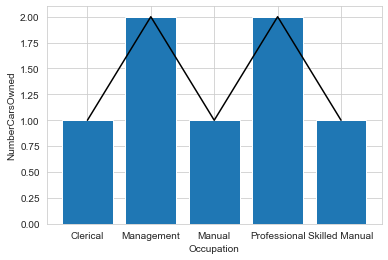

In [98]:
counts = AW_data.groupby(["Occupation"], as_index = False)['NumberCarsOwned'].median()
print(counts)
temp = np.array([counts['Occupation'],counts['NumberCarsOwned']])
plt.plot(temp[0], temp[1], color = 'k')
plt.bar(temp[0], temp[1])
plt.title('')
plt.xlabel('Occupation')
plt.ylabel('NumberCarsOwned')

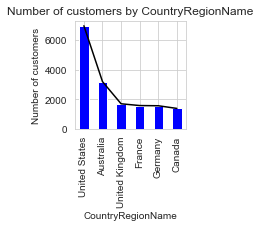

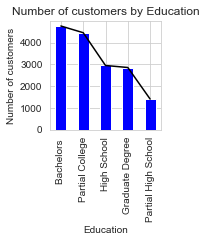

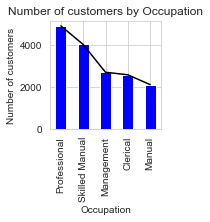

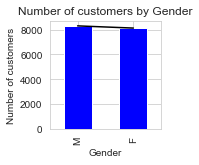

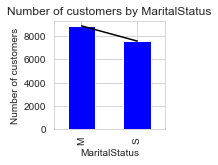

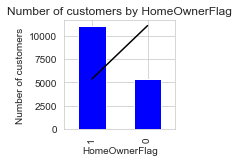

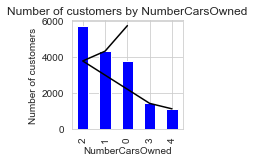

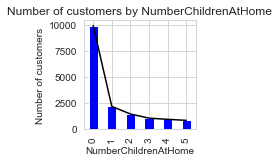

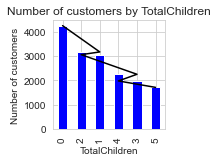

In [99]:
def plot_bars(data, cols):
    for col in cols:
        fig = plt.figure(figsize=(2,2)) 
        ax = fig.gca()    
        counts = data[col].value_counts() 
        counts.plot(ax = ax, color = 'k')
        counts.plot.bar(ax = ax, color = 'blue')
        ax.set_title('Number of customers by ' + col) 
        ax.set_xlabel(col) 
        ax.set_ylabel('Number of customers')
        plt.show()
plot_bars(AW_data, cat_cols)

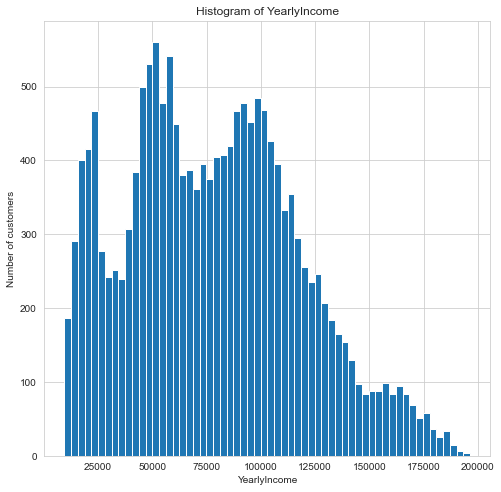

KeyError: 'Age'

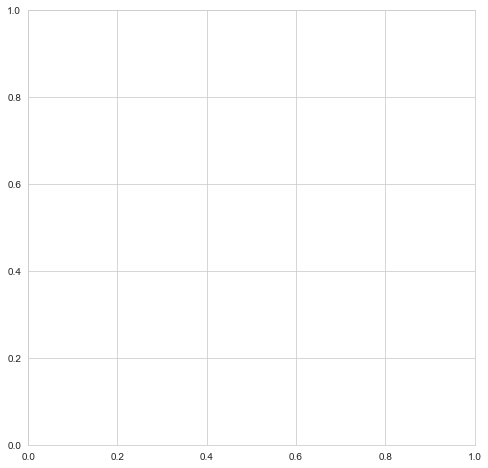

In [100]:
def plot_histogram(data, cols, bins = 60):
    for col in cols:
        fig = plt.figure(figsize=(8,8))
        ax = fig.gca() 
        #data[col].plot(ax = ax, color = 'k') 
        data[col].plot.hist(ax = ax, bins = bins) 
        ax.set_title('Histogram of ' + col) 
        ax.set_xlabel(col) 
        ax.set_ylabel('Number of customers')
        plt.show()

num_cols  = ['YearlyIncome', 'Age']
plot_histogram(AW_data, num_cols)

In [ ]:
def plot_violin(data, cols, y = 'AveMonthSpend'):
    for i in cols:
        sns.violinplot(x = i, y = y, data = data)
        plt.xlabel(i) 
        plt.ylabel(y)
        plt.show()
plot_violin(AW_data, cat_cols)

def plot_box(data, cols, x = 'BikeBuyer'):
    for i in cols:
        sns.boxplot(x, i, data = data)
        plt.xlabel(x) 
        plt.ylabel(i)
        plt.show()
plot_box(AW_data, inc_cols)

In [101]:
#REGRESSION MODEL